## Lecture-7 Information Retrieval

In [1]:
file_base = "D:/PycharmProjects/Example/NPL/result"

In [2]:
import os

In [3]:
os.listdir(file_base)

['(一）钢补强全自动贴合机（二）XSCAN-A100检测线路BGA焊接等内部缺陷。.txt',
 '(印刷线路板)板材组成及行业链.txt',
 '(原创)Dxdesigner使用流程3(续).txt',
 '(原创)解决orCAD 10.3绿色版原理图打不开的问题.txt',
 '(急)求助请教GC-CAM编辑D码的转换方法.txt',
 '(新)华笙(siland)软件针床制作规程.txt',
 '(求助)双层板差分线阻抗匹配问题.txt',
 '(深圳兼职）诚聘PCB工程师，熟悉软硬件，主要是控制LED灯.txt',
 '(经典)电子工程师的设计经验笔记（一）.txt',
 '(经典)电子工程师的设计经验笔记（二）.txt',
 '(转)七位工程师经过多年积累的PCB元件库合集篇.txt',
 '(转贴) PCB类书籍下载.txt',
 '+PA的疑問.txt',
 '--------PCB光析OS测试治具 工程师 求职中 -------.txt',
 '.csa和.cpa文件怎么打开？.txt',
 '.mcm(brd) 文件規格.txt',
 '.pattern软件用什么能打开？.txt',
 '.PCB资料转为.GBR data 求助.txt',
 '.txt',
 '0.35PCHI的QFN芯片焊接短路！！.txt',
 '0.5mm pitch的BGA芯片布线，线宽和过孔选多大的合适？.txt',
 '08-10-18新贴 UCAM基础操作之不同层之间的图像对比.txt',
 '08-10-18新贴 UCAM基础操作之修复蚀刻死角和针孔.txt',
 '08-10-18新贴 UCAM基础操作之修正钻孔.txt',
 '08-10-18新贴 UCAM基础操作之合并层操作.txt',
 '08-10-18新贴 UCAM基础操作之手动层对位.txt',
 '08-10-18新贴 UCAM基础操作之选择NPTH孔.txt',
 '08-10-30新贴 UCAM基础操作之标注尺寸及角度.txt',
 '08-10-30新贴 UCAM基础操作之标注弧度及注解.txt',
 '08-5-25 IPC-A-600G中文扫描高清晰版下载.txt',
 '08-6-6 IPC-TM-650中文扫描高清晰版下载.txt',
 '08-9-23新贴 UCAM基础操作之删除

### Task,build a search engine, input: some words, output are the documents

In [4]:
import jieba

In [5]:
def cut(string): return " ".join(jieba.cut(string))

In [6]:
import os

In [7]:
corpus = [
    cut(open(os.path.join(file_base, f), encoding='utf-8').read()) for f in os.listdir(file_base)
]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lixin\AppData\Local\Temp\jieba.cache
Loading model cost 0.745 seconds.
Prefix dict has been built succesfully.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [9]:
tfidf = vectorizer.fit_transform(corpus)

### https://scikit-learn.org/stable/modules/feature_extraction.html#loading-features-from-dicts

In [10]:
vectorizer.vocabulary_

{'补强': 68322,
 '全自动': 33572,
 '贴合': 70285,
 'xscan': 26475,
 'a100': 8234,
 '检测': 55705,
 '线路': 65221,
 'bga': 9754,
 '焊接': 59575,
 '内部': 34252,
 '缺陷': 65887,
 '设备': 69360,
 '主要': 29651,
 '应用': 46639,
 '柔性': 55293,
 '线路板': 65224,
 '行业': 68231,
 '适用': 72266,
 'fpc': 14179,
 '卷式': 37540,
 '材料': 54809,
 'sus': 23748,
 'emi': 13193,
 'shield': 22617,
 'pi': 20058,
 '进行': 72021,
 '高精度': 76495,
 '冲切': 34447,
 '通过': 72530,
 '可视': 39049,
 '系统': 64695,
 'vision': 25647,
 'system': 23848,
 '定位': 44066,
 'fpcb': 14182,
 '板上': 55008,
 '指定': 50363,
 '位置': 31801,
 '产品': 30557,
 '假贴': 32744,
 '经过': 65420,
 '工序': 45658,
 '不仅': 28099,
 '更加': 53793,
 '耐用': 66447,
 '而且': 66335,
 '可以': 38861,
 '满足': 58840,
 '工艺': 45702,
 '加工': 36199,
 '需求': 75309,
 '作业': 32039,
 '成本': 48794,
 '高效率': 76410,
 '稳定性': 63560,
 '高性能': 76394,
 '同类产品': 39526,
 '优势': 31419,
 '明显': 53357,
 '我司': 48864,
 '科技': 63292,
 '团队': 40810,
 '辛勤': 71471,
 '技术': 49620,
 '研发': 62668,
 '2014': 3093,
 '隆重推出': 74885,
 '专利产品': 28616,
 '100': 460,
 

In [11]:
transposed_tfidf = tfidf.transpose()

In [12]:
transposed_tfidf

<76868x9715 sparse matrix of type '<class 'numpy.float64'>'
	with 685747 stored elements in Compressed Sparse Column format>

In [13]:
import numpy as np

In [14]:
transposed_tfidf_array = transposed_tfidf.toarray()

In [15]:
transposed_tfidf_array.shape

(76868, 9715)

In [16]:
np.where(transposed_tfidf_array[6])

(array([663], dtype=int64),)

In [17]:
def get_word_id(word):
    return vectorizer.vocabulary_.get(word,None)

In [18]:
get_word_id("上海")

27814

In [19]:
[get_word_id(c) for c in "机械 制作".split()]

[54660, 35690]

In [20]:
transposed_tfidf_array[76825]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
w1_candidates = set(np.where(transposed_tfidf_array[54660])[0])

In [22]:
w1_candidates

{0,
 8,
 9,
 47,
 133,
 135,
 146,
 190,
 261,
 378,
 388,
 409,
 430,
 453,
 472,
 478,
 486,
 487,
 494,
 496,
 501,
 594,
 691,
 692,
 696,
 818,
 959,
 978,
 1111,
 1475,
 1597,
 1684,
 2096,
 2113,
 2118,
 2141,
 2161,
 2171,
 2188,
 2221,
 2228,
 2234,
 2238,
 2279,
 2280,
 2281,
 2288,
 2293,
 2295,
 2296,
 2307,
 2325,
 2343,
 2349,
 2388,
 2408,
 2409,
 2414,
 2426,
 2440,
 2448,
 2474,
 2477,
 2478,
 2479,
 2498,
 2515,
 2517,
 2703,
 2756,
 2761,
 2763,
 2843,
 3075,
 3293,
 3340,
 3416,
 3804,
 3828,
 4028,
 4061,
 4097,
 4104,
 4108,
 4109,
 4184,
 4185,
 4201,
 4221,
 4260,
 4271,
 4272,
 4274,
 4280,
 4282,
 4288,
 4289,
 4290,
 4291,
 4306,
 4325,
 4330,
 4341,
 4344,
 4351,
 4357,
 4371,
 4373,
 4390,
 4455,
 4458,
 4479,
 4480,
 4622,
 4642,
 4651,
 4687,
 4727,
 4736,
 4767,
 4808,
 4834,
 4844,
 4845,
 4854,
 4855,
 4856,
 4859,
 4864,
 4872,
 4876,
 4877,
 4975,
 5036,
 5161,
 5244,
 5273,
 5288,
 5289,
 5290,
 5291,
 5292,
 5293,
 5294,
 5295,
 5313,
 5353,
 5443,

In [23]:
w2_candidates = set(np.where(transposed_tfidf_array[35690])[0])

In [24]:
w2_candidates

{5,
 8,
 9,
 13,
 47,
 49,
 89,
 119,
 123,
 134,
 338,
 339,
 369,
 430,
 454,
 509,
 535,
 663,
 681,
 693,
 695,
 720,
 727,
 730,
 743,
 746,
 769,
 773,
 788,
 789,
 793,
 798,
 800,
 801,
 803,
 812,
 815,
 825,
 854,
 860,
 925,
 962,
 972,
 1090,
 1091,
 1097,
 1148,
 1161,
 1162,
 1163,
 1266,
 1283,
 1287,
 1294,
 1316,
 1387,
 1389,
 1422,
 1429,
 1438,
 1439,
 1511,
 1527,
 1649,
 1683,
 1704,
 1720,
 1802,
 1892,
 2017,
 2019,
 2026,
 2054,
 2063,
 2075,
 2092,
 2097,
 2100,
 2110,
 2121,
 2127,
 2159,
 2169,
 2196,
 2197,
 2203,
 2234,
 2246,
 2257,
 2268,
 2283,
 2298,
 2306,
 2332,
 2335,
 2340,
 2347,
 2352,
 2362,
 2372,
 2379,
 2385,
 2393,
 2401,
 2409,
 2414,
 2416,
 2426,
 2431,
 2440,
 2441,
 2444,
 2459,
 2487,
 2491,
 2498,
 2511,
 2521,
 2523,
 2540,
 2552,
 2556,
 2590,
 2599,
 2623,
 2649,
 2688,
 2705,
 2752,
 2761,
 2764,
 2767,
 2782,
 2786,
 2817,
 2854,
 2855,
 2939,
 3041,
 3049,
 3063,
 3084,
 3113,
 3154,
 3278,
 3290,
 3308,
 3312,
 3390,
 3403,
 34

In [25]:
retrieval_document = w1_candidates & w2_candidates

In [26]:
import re
pat = re.compile('(test|ok)')

In [27]:
string = 'this is a test, and the result is ok'

In [28]:
pat.sub(repl="##\g<0>##", string=string)

'this is a ##test##, and the result is ##ok##'

In [29]:
for i in retrieval_document:
    print('*'*8)
    print(''.join(corpus[i].split()))

********
湿敏电阻是利用湿敏材料吸收空气中的水分而导致本身电阻值发生变化这一原理而制成的。工业上流行的湿敏电阻主要有氯化锂湿敏电阻，有机高分子膜湿敏电阻。工业上流行的湿敏电阻主要有：1、半导体陶瓷湿敏元件；2、氯化锂湿敏电阻；3、有机高分子膜湿敏电阻。湿敏电阻的特点是在基片上覆盖一层用感湿材料制成的膜，当空气中的水蒸气吸附在感湿膜上时，元件的电阻率和电阻值都发生变化，利用这一特性即可测量湿度。湿敏电容一般是用高分子薄膜电容制成的，常用的高分子材料有聚苯乙烯、聚酰亚胺、酪酸醋酸纤维等。当环境湿度发生改变时，湿敏电容的介电常数发生变化，使其电容量也发生变化，其电容变化量与相对湿度成正比。湿敏电阻的工作原理：湿敏电阻式传感器主要由感湿层3、电极4和具有一定机械强度的绝缘基片2组成，如图1所示。感湿层在吸收了环境中的水分后引起两电极间电阻值的变化，这样就将相对湿度的变化转换成电阻值的变化。湿敏电阻结构示意图湿敏电阻只能用交流的，直流会导致湿敏失效，因为直流的电场会导致高分子材料中的带电粒子偏向两极，一定时间以后湿敏电阻就会失效。所以必须用交流维持其动态平衡，这也是为什么测湿敏电阻阻值要用电桥而不能用普通万用表的原因。水分子是极性分子，在直流电场中会分解为H2及O2，影响测量，并且在湿度传感器中存在导电离子，在高湿情况下，如采用直流电会漂移，造成电导率漂移，影响传感器的使用寿命。可采用RC充放电，计时方式，有些芯片有RFC功能，亦可使用，或用IC直接产生1KHZ方波，叠加在采样电阻与湿度传感器之上，通过AD，在正周期内测量分压亦可。或采用模拟电路，通过对数运算进行R/V转换，再AD采样。湿敏电阻的应用：湿敏电阻器广泛应用于洗衣机、空调器、录像机、微波炉等家用电器及工业、农业等方面作湿度检测、湿度控制用。如图所示，是湿度检测器电路原理图。湿度检测器电路原理图图2所示电路中，由555时基电路、湿度传感器CH等组成多谐振荡器，在振荡器的输出端接有电容器C2，它将多谐振荡器输出的方波信号变为三角波。当相对湿度变化时，湿度传感器CH的电容量将随着改变，它将使多谐振荡器输出的频率及三角波的幅度都发生相应的变化，输出的信号经VD1，VD2整流和C4滤波后，可从电压表上直接读出与相对湿度相应的指数来。Rp电位器用于仪器的调零。氯化锂湿敏电阻多片电阻组合式氯化锂湿敏传感器是利用湿敏元件

In [30]:
def get_candidates_ids(input_string):
    return [get_word_id(c) for c in cut(input_string).split()]

In [31]:
get_candidates_ids('机械 齿轮')

[54660, 76825]

In [32]:
def get_candidates_pat(input_string):
    return '({})'.format('|'.join(cut(input_string).split()))

In [33]:
get_candidates_pat('机械 齿轮')

'(机械|齿轮)'

In [34]:
pat = re.compile('(机械|齿轮)')

for r in retrieval_document:
    print('*'*8)
    output = pat.sub(repl='__###__\g<1>__###__', string=corpus[r])
    print(''.join(output.split()))

********
湿敏电阻是利用湿敏材料吸收空气中的水分而导致本身电阻值发生变化这一原理而制成的。工业上流行的湿敏电阻主要有氯化锂湿敏电阻，有机高分子膜湿敏电阻。工业上流行的湿敏电阻主要有：1、半导体陶瓷湿敏元件；2、氯化锂湿敏电阻；3、有机高分子膜湿敏电阻。湿敏电阻的特点是在基片上覆盖一层用感湿材料制成的膜，当空气中的水蒸气吸附在感湿膜上时，元件的电阻率和电阻值都发生变化，利用这一特性即可测量湿度。湿敏电容一般是用高分子薄膜电容制成的，常用的高分子材料有聚苯乙烯、聚酰亚胺、酪酸醋酸纤维等。当环境湿度发生改变时，湿敏电容的介电常数发生变化，使其电容量也发生变化，其电容变化量与相对湿度成正比。湿敏电阻的工作原理：湿敏电阻式传感器主要由感湿层3、电极4和具有一定__###__机械__###__强度的绝缘基片2组成，如图1所示。感湿层在吸收了环境中的水分后引起两电极间电阻值的变化，这样就将相对湿度的变化转换成电阻值的变化。湿敏电阻结构示意图湿敏电阻只能用交流的，直流会导致湿敏失效，因为直流的电场会导致高分子材料中的带电粒子偏向两极，一定时间以后湿敏电阻就会失效。所以必须用交流维持其动态平衡，这也是为什么测湿敏电阻阻值要用电桥而不能用普通万用表的原因。水分子是极性分子，在直流电场中会分解为H2及O2，影响测量，并且在湿度传感器中存在导电离子，在高湿情况下，如采用直流电会漂移，造成电导率漂移，影响传感器的使用寿命。可采用RC充放电，计时方式，有些芯片有RFC功能，亦可使用，或用IC直接产生1KHZ方波，叠加在采样电阻与湿度传感器之上，通过AD，在正周期内测量分压亦可。或采用模拟电路，通过对数运算进行R/V转换，再AD采样。湿敏电阻的应用：湿敏电阻器广泛应用于洗衣机、空调器、录像机、微波炉等家用电器及工业、农业等方面作湿度检测、湿度控制用。如图所示，是湿度检测器电路原理图。湿度检测器电路原理图图2所示电路中，由555时基电路、湿度传感器CH等组成多谐振荡器，在振荡器的输出端接有电容器C2，它将多谐振荡器输出的方波信号变为三角波。当相对湿度变化时，湿度传感器CH的电容量将随着改变，它将使多谐振荡器输出的频率及三角波的幅度都发生相应的变化，输出的信号经VD1，VD2整流和C4滤波后，可从电压表上直接读出与相对湿度相应的指数来。Rp电位器用于仪器的调零。氯化锂湿敏电阻多片电阻组合式氯

In [35]:
from functools import  reduce

In [36]:
from operator import and_

In [37]:
and_({1,2},{2,3})

{2}

In [40]:
from scipy.spatial.distance import cosine

In [41]:
cosine([1,1,1],[1,1,2])

0.057190958417936755

In [50]:
def search_engineer(query):
    candidates_ids = get_candidates_ids(query)
    
    v1 = vectorizer.transform([cut(query)]).toarray()[0]
    
    candidates = [set(np.where(transposed_tfidf_array[_id])[0]) for _id in candidates_ids]
    
    merged_candidates = reduce(and_, candidates)
    
    pat = re.compile(get_candidates_pat(query))
    
#     vector_with_id = [(tfidf[i], i) for i in merged_candidates]
    
#     sorted_vector_with_ids = sorted (vector_with_id, key=lambda x:cosine(x[0].toarray(), v1))
    
#     sorted_ids = [i for v, i in sorted_vector_with_ids]
    
    for c in merged_candidates:
#         print('*'*8)
        output = pat.sub(repl='**\g<1>**', string=corpus[c])
#         print(''.join(output.split()))
        yield ''.join(output.split())

In [43]:
search_engineer('机械 制造')

********
高性能中大功率交流伺服驱动器。该系列产品功率范围为100W—75KW，支持MODBUS、CANlink和CANopen通信协议，采用对应通信接口可配合上位机实现多台伺服驱动器联网运行。提供了刚性表设置、惯量辨识、**机械**特性分析及振动抑制功能，使伺服驱动器简单易用。配合包括小惯量、中惯量的系列高响应伺服电机（电机搭配20位增量式或23位多圈绝对值编码器）运行安静平稳，定位控制更加精准。适用于凹印机、柔印机、瓦楞纸印刷设备、半导体**制造**设备、贴片机、印刷电路板打孔机、搬运**机械**、食品加工**机械**、机床、传送**机械**等自动化设备，实现快速精确的位置控制、速度控制。------------------------------------------------------------------变频伺服步进工控产品研发生产技术方案提供商深圳市伊瑞软件技术有限公司ShenzhenErikSoftwareTechnologyCo.,Ltd扣扣：二零五八八四三八二零联系电话：高端1矢量3变频8技术2伺服3PLC1步进3电梯7逆变4源码6**4
********
关于无铅**制造**早已不是什么新鲜的话题，近年来只要是和电子**制造**有关的展会、技术研讨会或者在各种行业媒体上，都将与无铅有关的内容作为介绍重点。如果说前两年更多是进行环保法规的宣传与普及，最近一段时期我们则看到业界把关注点放到具体的操作与执行层面，例如怎样根据应用要求选择无铅焊接材料、如何调整生产线工艺等等。在材料与设备供应商的宣传之下，一些从事组装**制造**的厂商们相信似乎只要上游供应商提供的都是无铅元器件，同时选择合适焊接材料并设置好机器运行参数即可万事大吉，顺利完成向无铅**制造**的转换。然而事实并不那么简单，生产**制造**只是保证最终产品满足要求的一个步骤，实际上**制造**商还必须从产品生命周期每个环节入手，加强对整个供应链的管理，才能从根本上解决环保法规带来的困扰，避免以后在市场上处于被动。我们不妨先来了解无铅**制造**会给业界造成哪些影响。在电子**制造**中限制使用铅的初衷是为了减少产品对环境的污染，但遗憾的是倡议者并没有更多考虑厂商的利益，其结果是给**制造**商带来了双重打击。首先是产品直接成本上升。实现同样功能的部件或材料，无铅型号普遍要比有

In [44]:
for document in search_engineer('机械 制造 公司'):
    print('*'*8)
    print(document)

********
深圳市鑫益城**机械**模具有限**公司**主要以**制造**精密FPC/PCB线路板模具、LED铝基线路板、铝/铜/铁基板模具为主，**公司**拥有先进的生产设备与专业的技术人员，以严格科学的管理为广大客户提供优质的线路板模具服务。本**公司**目前有日本沙迪AQ400L/AQ535L系列慢走丝、台湾台群850电脑锣、CNC数控钻、WireCut线割机、冲床、台湾建德大水磨床、旺磐精密小磨床、侧面铣、铣床、钻床等**制造**设备，并配有高精度检测仪器，结合韩国、日本模具总结出一套符合国际质量标准的高档线路板模具**制造**经验。**公司**全力推行ISO9001：2008版，严格按照标准化的流程作业。现有员工40余人，月生产能力达到200套以上。竭诚希望能与国内大中小型线路板企业合作，共创美好的明天！欢迎新老客户来厂参观考察。
********
交流伺服驱动器源程序技术方案资料转移深圳伊瑞以全心全意为顾客服务，帮助客户解决难题，也赢得了广大客户的一致好评。深圳市伊瑞软件技术有限**公司**是一家致力于新能源汽车驱动器、变频器方案、伺服驱动器技术方案、步进驱动、PLC可编程控制器、HMI技术方案、电梯一体机技术方案，并且为客户提供系列化的解决方案于一体的综合性高新科技企业。人生有许多次选择,一次对的选择将改变一生,深圳伊瑞欢迎你的来电.**公司**部分产品技术展示：交流伺服驱动器源程序技术方案资料转移产品特性/Features●宽范围、多型号：0.05Kw~22Kw●电流前馈控制，加速度前馈控制：高响应●自动调整增益，在线实时检测负载惯量：设置简便●多种反馈接口：17位串行编码器，2500P/R编码器，旋转变压器●丰富的通信功能：CANopen,EtherCAT,POWERLINK,PROFIBUS,Modbus●三相400V供电可用于1Kw~22Kw●单相/三相100V供电可用于0.2Kw~0.75Kw●低频率振动抑制功能，低速运动时性能出色●位置控制模式下回零方式●电子齿轮比动态切换功能用通用伺服：广泛应用在数控机床、刨槽**机械**、木工**机械**、包装**机械**、纺织**机械**、印刷**机械**、**机械**手、医疗**机械**、玉石加工**机械**、3D影院座椅、汽车仿真**机械**等关于售后：1、提供全套、有效的相关技术资料2、诚

TypeError: 'NoneType' object is not iterable

In [45]:
v1 = vectorizer.transform(['机械 制造 公司']).toarray()[0]

In [46]:
cosine(v1, tfidf[100].toarray())

1.0

In [54]:
with open('with_sorted_result.md', 'w', encoding='utf-8') as f:
    for i, document in enumerate(search_engineer('机械 制造 公司')):
        f.write('\n## search result {}\n'.format(i))
        f.write(document + 'n')
    print('done!')

done!


## Introduction to PageRank

In [55]:
import networkx as nx

In [56]:
import random

In [57]:
from string import ascii_letters

In [58]:
def generate_name(): return ''.join(random.choice(ascii_letters.upper()) for _ in range(4))

In [59]:
generate_name()

'GVSB'

In [60]:
social_graph ={
    "Yao":['Guo', 'Wang', 'Tian', 'Tim'] + [generate_name() for _ in range(4)],
    'Guo':['Li'] + [generate_name() for _ in range(5)],
    'Wang':['Li_2']+[generate_name() for _ in range(5)],
    'Li_2':[generate_name() for _ in range(5)],
    'Li':[generate_name() for _ in range(1)],
    
}

In [61]:
social_graph

{'Yao': ['Guo', 'Wang', 'Tian', 'Tim', 'MQYA', 'NUVB', 'BJFC', 'ROGB'],
 'Guo': ['Li', 'ZTVD', 'NEJZ', 'EEQD', 'CMLG', 'PSZV'],
 'Wang': ['Li_2', 'YZST', 'NXWL', 'OSWZ', 'PISW', 'LTLV'],
 'Li_2': ['OAIA', 'QODB', 'YKQH', 'WWRC', 'QPAG'],
 'Li': ['TBTI']}

In [62]:
social_network = nx.graph.Graph(social_graph)

In [63]:
%matplotlib inline

d:\program files (x86)\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


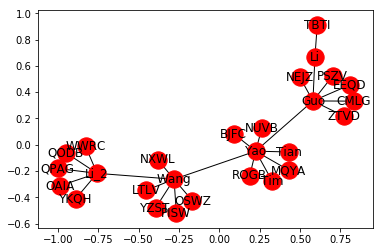

In [64]:
nx.draw_networkx(social_network)

In [66]:
sorted(nx.pagerank(social_network).items(), key=lambda x:x[1] ,reverse=True)

[('Yao', 0.14018616244938112),
 ('Guo', 0.12625952492883674),
 ('Wang', 0.12354105488402628),
 ('Li_2', 0.11100157862592008),
 ('Li', 0.04009295437632798),
 ('TBTI', 0.022595018111845305),
 ('OAIA', 0.021279981196290158),
 ('QODB', 0.021279981196290158),
 ('YKQH', 0.021279981196290158),
 ('WWRC', 0.021279981196290158),
 ('QPAG', 0.021279981196290158),
 ('ZTVD', 0.02088716348418851),
 ('NEJZ', 0.02088716348418851),
 ('EEQD', 0.02088716348418851),
 ('CMLG', 0.02088716348418851),
 ('PSZV', 0.02088716348418851),
 ('YZST', 0.020557581368083087),
 ('NXWL', 0.020557581368083087),
 ('OSWZ', 0.020557581368083087),
 ('PISW', 0.020557581368083087),
 ('LTLV', 0.020557581368083087),
 ('Tian', 0.020450012730142263),
 ('Tim', 0.020450012730142263),
 ('MQYA', 0.020450012730142263),
 ('NUVB', 0.020450012730142263),
 ('BJFC', 0.020450012730142263),
 ('ROGB', 0.020450012730142263)]